<a href="https://colab.research.google.com/github/Samannita29/LINEAR-REGRESSION/blob/master/CarPrice_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
print(os.getcwd())

/content


In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [3]:
#import glob
#path = r'data' # use your path
#all_files = glob.glob(path + "/*.csv")
#li = []
#col_names=['A', 'B', 'C', 'D', 'E'] 
#for filename in all_files:
#    df = pd.read_csv(filename, header=None, usecols=[1, 3, 4, 5, 9], names=col_names)
#    df.reset_index(drop=True, inplace=True)
#    li.append(df)
#frame = pd.concat(li, axis=0, ignore_index=True)
#frame.shape
#frame.to_csv('anomalysmall.csv')

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
col= ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
car_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names = col)

In [5]:
car_df.tail(204)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
car_df.shape

(205, 26)

In [7]:
car_df.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [8]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [9]:
car_df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [10]:
car_df = car_df.drop('make', axis=1) 
car_df = car_df.drop('fuel_type', axis=1)
car_df = car_df.drop('engine_location', axis=1)
car_df = car_df.drop('num_of_doors', axis=1) 
car_df = car_df.drop('body_style' , axis=1)
car_df = car_df.drop('drive_wheels', axis=1)
car_df = car_df.drop('engine_type', axis=1)
car_df = car_df.drop('fuel_system', axis=1)
car_df = car_df.drop('aspiration', axis=1)
car_df = car_df.drop('normalized_losses', axis=1)

In [11]:
car_df.columns

Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'num_of_cylinders', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [12]:
car_df.shape

(205, 16)

In [13]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [14]:
car_df['num_of_cylinders']

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num_of_cylinders, Length: 205, dtype: object

In [15]:
car_df['cylinder'] = car_df['num_of_cylinders'].replace({'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five':5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12})

In [16]:
car_df['cylinder']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylinder, Length: 205, dtype: int64

In [17]:
car_df = car_df.replace('?', np.nan)  
#car_df[car_df.isnull().any(axis=1)]  # display records with 'NA' 

In [18]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
cylinder               int64
dtype: object

In [19]:
car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke']= car_df['stroke'].astype('float64')
car_df['horsepower']= car_df['horsepower'].astype('float64')
car_df['peak_rpm']= car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')

In [20]:
car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df['bore']= car_df['bore'].fillna(car_df['bore'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['cylinder'] = car_df['cylinder'].fillna(car_df['cylinder'].median())

In [21]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
cylinder               int64
dtype: object

In [22]:
# Look at the distribution of data on the various attributes. Look for outliers.... 
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


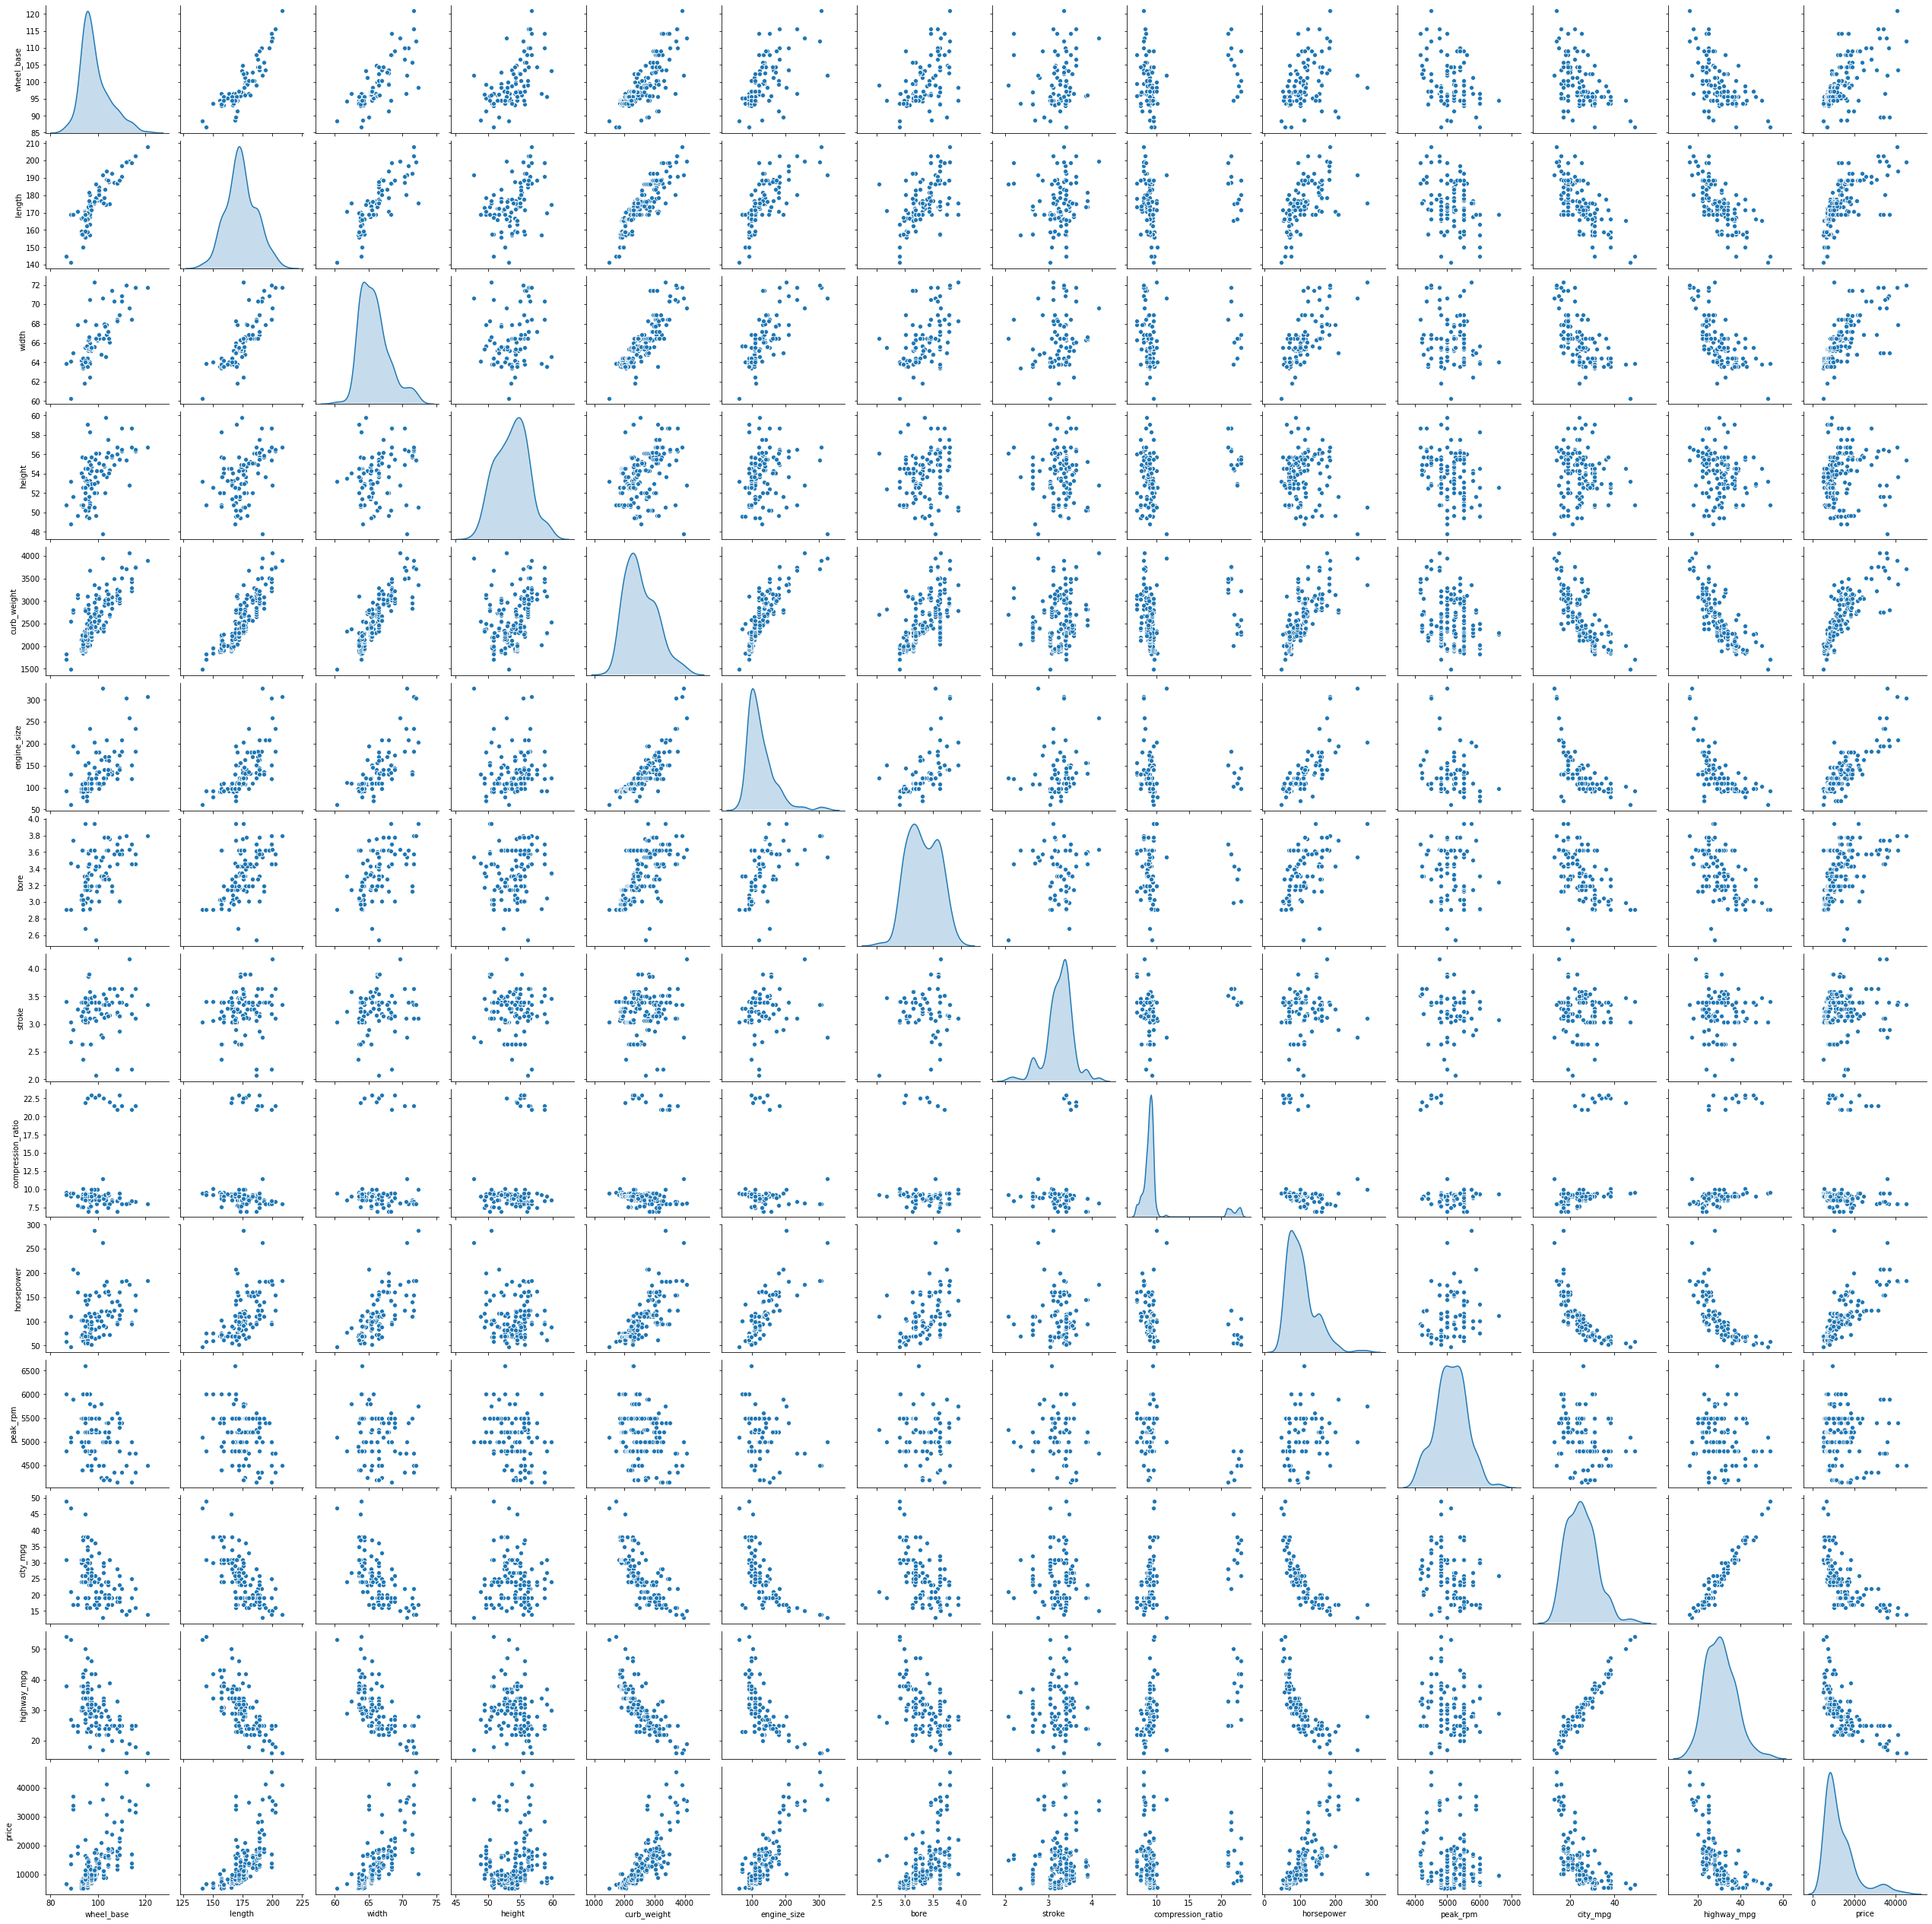

In [23]:
import seaborn as sns
car_df_attr = car_df.iloc[:,1:16]
sns.pairplot(car_df_attr , diag_kind = 'kde')

Do not consider other attributes such as number of doors, engine location etc due to low variance filter concept
pair plot shows clearly some relation between price and height, curb weight, engine size, number of cylinders, horsepower and inversely related to mpg

The data seems to be a mix of cars of high end and economy leading to a cluster of points at lower end in many of the attributes, leading to a long tail in multiple attributes

In [24]:
car_df.shape

(205, 17)

In [25]:
X = car_df.drop('price', axis=1)

In [26]:
y = car_df['price']
X = X.drop('num_of_cylinders', axis=1)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [29]:
X_train.shape

(153, 15)

In [30]:
type(X_train)

pandas.core.frame.DataFrame

In [31]:
X_test.shape

(52, 15)

In [32]:
y_train.shape

(153,)

In [33]:
type(y_train)

pandas.core.series.Series

In [34]:
y_test.shape

(52,)

In [35]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
regression_model.score(X_test, y_test)

0.836217648329037

How can the model peformance be improved? 
1. Always address outliers first. Linear models get easily impacted by outliers
2. We noticed that on many attributes, there was a clump of data points on lower values and scattered on high values
3. That is an indication of mixing data from two or more different segments. Maybe if we segregate the data we will get better results
4. Not all attributes show a linear relation to price. Convert these attributes to quadratic form which may give a better fit on linear model